In [1]:
from notebook_setup.with_matplotlib import *
from IPython.display import display
init_nb()
toggle_code_button()

In [2]:
substr_alpha = 0.58 # following Curry &al, 2005
glass_n = 1.52

media_n = {
    'vacuum': 1,
    'water': 1.33301,
    'glycerol': 1.47,
    'water_on_glass': substr_alpha * 1.33 + (1 - substr_alpha) * glass_n,
    'glycerol_on_glass': substr_alpha * 1.47 + (1 - substr_alpha) * glass_n
}

#diameter = np.array([5, 10, 20, 50, 80, 100])
#diameter = np.concatenate([np.arange(1, 10), np.arange(10, 80, 5)])
diameter = 80
radius = diameter/2

lambda_vac = np.arange(400, 800, 0.1)

# Find the relevant refractive index of gold!
from pump_probe.aunp.refractive_index import *
aunp_n = ( sp.interpolate.interp1d(Au_data.Wavelength*1e9, Au_data.nReal, kind='cubic')(lambda_vac)
  + 1.0j * sp.interpolate.interp1d(Au_data.Wavelength*1e9, Au_data.nImag, kind='cubic')(lambda_vac) )

aunp_n

array([ 1.55400000+1.869j     ,  1.55403735+1.86901712j,
        1.55407400+1.86903228j, ...,  0.12379912+4.85654452j,
        0.12379939+4.85736299j,  0.12379969+4.85818148j])

In [6]:
n_medium = media_n['water_on_glass']

import scattnlay

k = 2 * np.pi * n_medium / lambda_vac
x = np.array([radius * k]).T
m = np.array([aunp_n/n_medium]).T
(terms, Qext, Qsca, Qabs, Qbk, Qpr, g, Albedo, S1, S2) = scattnlay.scattnlay(x, m)
sigma_ext = Qext * x[:,-1]**2 * np.pi * k**(-2)
sigma_abs = Qabs * x[:,-1]**2 * np.pi * k**(-2)
sigma_sca = Qsca * x[:,-1]**2 * np.pi * k**(-2)

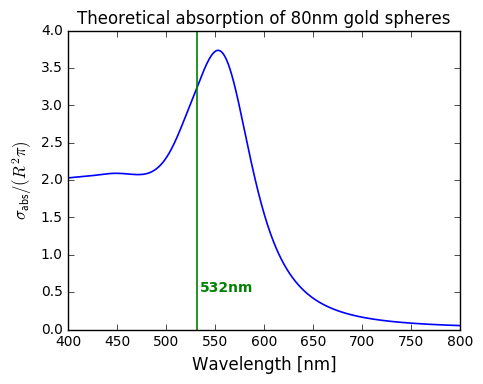

In [56]:
plt.figure(figsize=(5,4))

plt.plot(lambda_vac, sigma_abs / (np.pi * radius**2), linewidth=1.2)
plt.axvline(532, color='green', linewidth=1.2)

plt.tick_params(axis='both', which='major', labelsize=10)

plt.text(534, 0.5, "532nm", color='green', weight='semibold', size=10)

plt.ylabel('$\sigma_\mathsf{abs} / (R^2 \pi)$')
plt.xlabel('Wavelength [nm]')

plt.title('Theoretical absorption of 80nm gold spheres', size=12)
plt.tight_layout()

#plt.savefig('out/80nm_abs.pdf')